# Gráficos de Dispersión

En esta entrada veremos cómo se comportan vectores aleatorios dependiendo de la covarianza y coeficiente de correlación entre ellos.

### Covarianza




### Coeficiente de correlación

La densidad de una normal bivariada con medias cero y varianzas 1 es:

$$
f(x,y) = \frac{1}{2\pi\sqrt{1-\rho^2}}
\exp\left(
-\frac{1}{2(1-\rho^2)}
\left( x^2 - 2\rho xy + y^2 \right)
\right).
$$

A continuación simularemos vectores aleatorios con esta distribución para valores distintos de $\rho$.


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [47]:
def densidad_normal_bivariada(x, y, rho):
    if abs(rho) == 1:
        # degenerada: todos los puntos caen sobre y = rho * x
        # devolvemos la densidad de la normal univariada de X
        return 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)
    else:
        exponente = -1/(2*(1-rho**2))*(x**2 - 2*rho*x*y + y**2)
        return 1/(2*np.pi*np.sqrt(1-rho**2)) * np.exp(exponente)


rho1 = -0.99
rho2 = -0.5
rho3 = 0
rho4 = 0.5
rho5 = 0.99
mean = [0, 0]

cov1 = [[1, rho1],
       [rho1, 1]]

cov2 = [[1, rho2],
       [rho2, 1]]

cov3 = [[1, rho3],
       [rho3, 1]]

cov4 = [[1, rho4],
       [rho4, 1]]

cov5 = [[1, rho5],
       [rho5, 1]]

X1 = np.random.multivariate_normal(mean, cov1, size=5000)
xpoints1 = X1[:,0]
ypoints1 = X1[:,1]
dens1 = [densidad_normal_bivariada(x,y,rho1) for x,y in zip(xpoints1,ypoints1)]
X2 = np.random.multivariate_normal(mean, cov2, size=5000)
xpoints2 = X2[:,0]
ypoints2 = X2[:,1]
dens2 = [densidad_normal_bivariada(x,y,rho2) for x,y in zip(xpoints2,ypoints2)]
X3 = np.random.multivariate_normal(mean, cov3, size=5000)
xpoints3 = X3[:,0]
ypoints3 = X3[:,1]
dens3 = [densidad_normal_bivariada(x,y,rho3) for x,y in zip(xpoints3,ypoints3)]
X4 = np.random.multivariate_normal(mean, cov4, size=5000)
xpoints4 = X4[:,0]
ypoints4 = X4[:,1]
dens4 = [densidad_normal_bivariada(x,y,rho4) for x,y in zip(xpoints4,ypoints4)]
X5 = np.random.multivariate_normal(mean, cov5, size=5000)
xpoints5 = X5[:,0]
ypoints5 = X5[:,1]
dens5 = [densidad_normal_bivariada(x,y,rho5) for x,y in zip(xpoints5,ypoints5)]

def graficar_normales(xpoints, ypoints, densidad, rho):
  plt.figure()
  plt.scatter(xpoints, ypoints, c=densidad, s=4, cmap='viridis')
  plt.title(f'Correlación: {rho}')
  plt.colorbar()
  plt.show()

Ahora graficamos los puntos

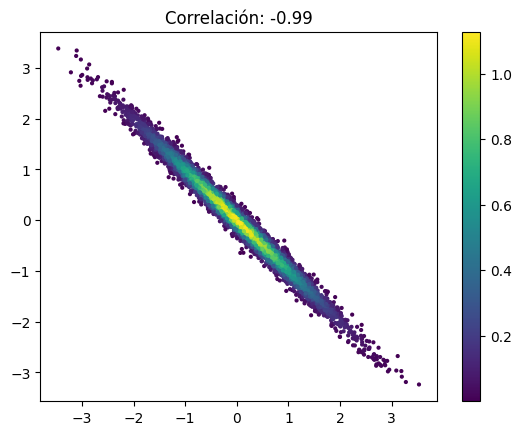

In [48]:
graficar_normales(xpoints1, ypoints1, dens1, rho1)

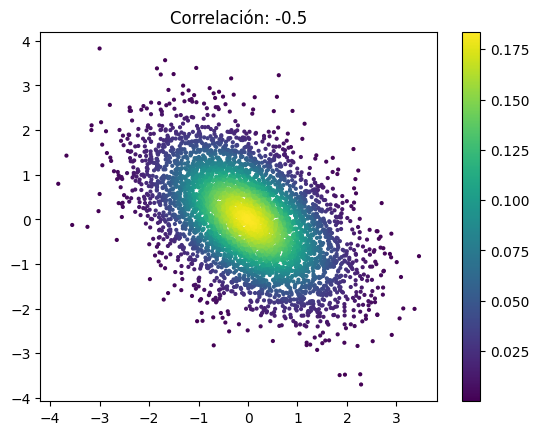

In [49]:
graficar_normales(xpoints2, ypoints2, dens2, rho2)

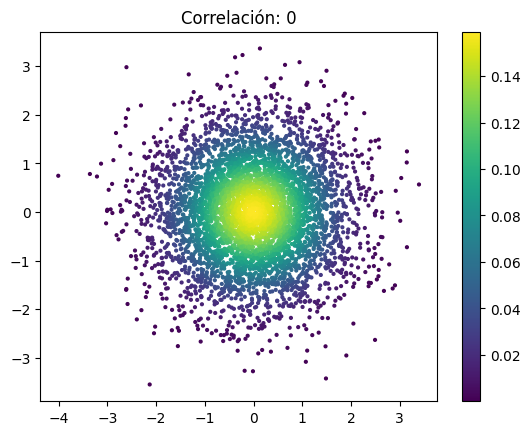

In [50]:
graficar_normales(xpoints3, ypoints3, dens3, rho3)

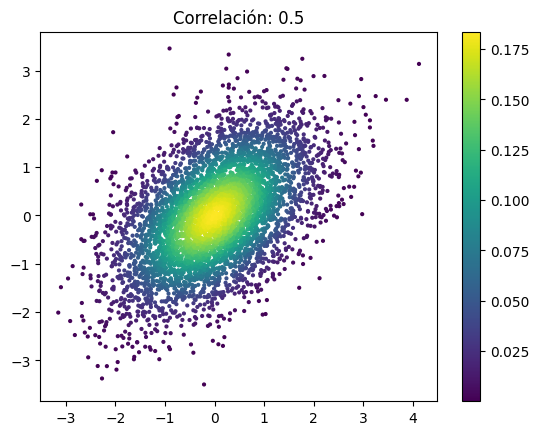

In [51]:
graficar_normales(xpoints4, ypoints4, dens4, rho4)

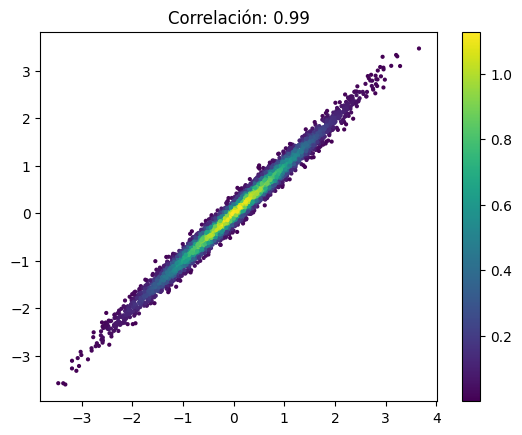

In [52]:
graficar_normales(xpoints5, ypoints5, dens5, rho5)

Ahora una función que hace todo automáticamente

In [66]:
def normal_multivariada(ro, N, mean = [0,0]):
  cov = [[1, ro],
       [ro, 1]]
  X = np.random.multivariate_normal(mean, cov, size=N)
  equis = X[:,0]
  ye = X[:,1]
  densidad = [densidad_normal_bivariada(x,y,ro) for x,y in zip(equis,ye)]
  graficar_normales(equis, ye, densidad, ro)


Veamos la función en acción

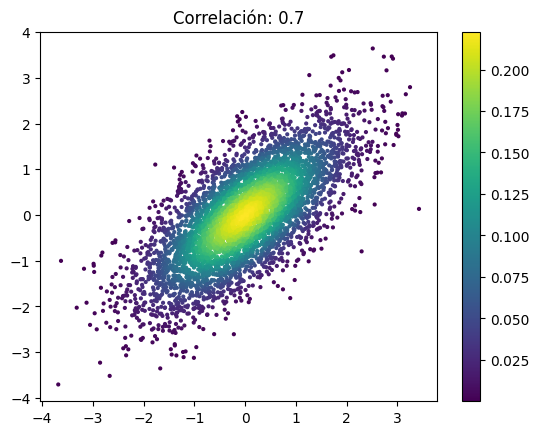

In [67]:
normal_multivariada(ro = 0.7, N = 5000)

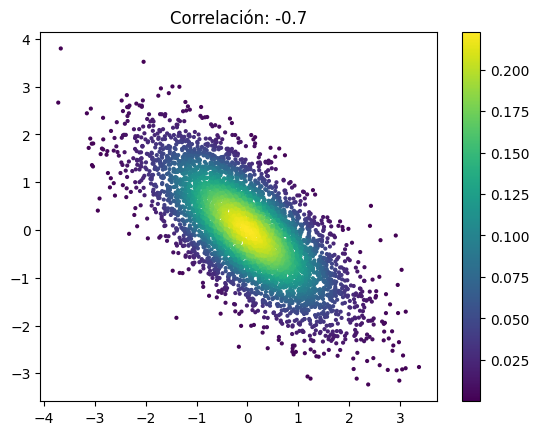

In [68]:
normal_multivariada(ro = -0.7, N = 5000)

# Covarianzas

In [69]:
import numpy as np

def densidad_normal_bivariada_cov(x, y, mean, cov):
    X = np.array([x, y])
    mu = np.array(mean)
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    diff = X - mu
    exponente = -0.5 * diff @ inv @ diff
    return 1/(2*np.pi*np.sqrt(det)) * np.exp(exponente)


In [70]:
def normal_multivariada_cov(cov, N, mean=[0,0]):
    # N puntos
    # cov: matriz 2x2
    # mean: lista con medias
    if np.linalg.det(cov) == 0:
        # caso degenerado: simulamos solo en la línea
        # diagonalizamos la matriz para encontrar dirección
        eigvals, eigvecs = np.linalg.eigh(cov)
        X1 = np.random.normal(0, np.sqrt(eigvals[1]), size=N)
        X = eigvecs[:,1] * X1[:,None]
        equis = X[:,0] + mean[0]
        ye = X[:,1] + mean[1]
    else:
        X = np.random.multivariate_normal(mean, cov, size=N)
        equis = X[:,0]
        ye = X[:,1]
    # calcular densidad para cada punto
    densidad = [densidad_normal_bivariada_cov(x, y, mean, cov) for x,y in zip(equis, ye)]
    graficar_normales(equis, ye, densidad, cov)


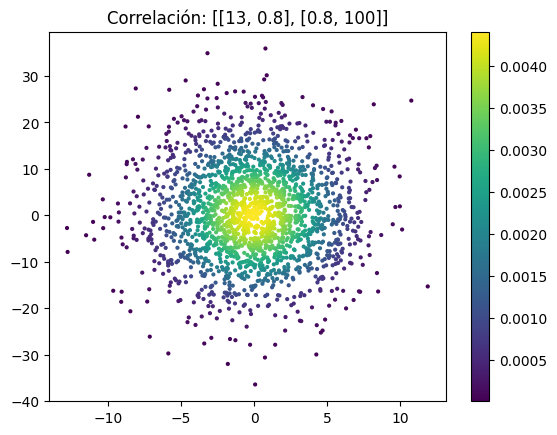

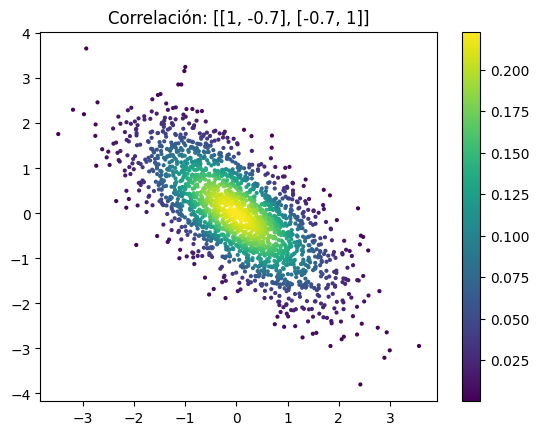

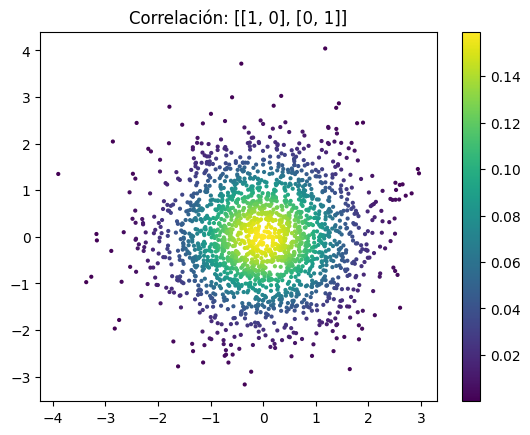

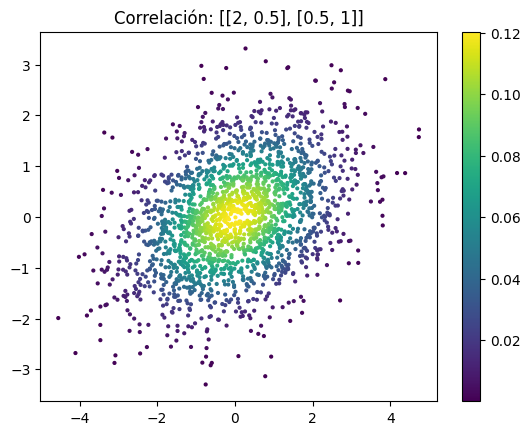

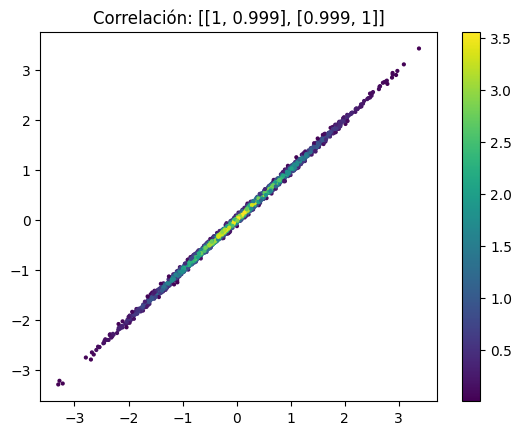

In [74]:
# 1. Correlación positiva
cov1 = [[13, 0.8], [0.8, 100]]
normal_multivariada_cov(cov1, 2000)

# 2. Correlación negativa
cov2 = [[1, -0.7], [-0.7, 1]]
normal_multivariada_cov(cov2, 2000)

# 3. Correlación cero
cov3 = [[1, 0], [0, 1]]
normal_multivariada_cov(cov3, 2000)

# 4. Desigual varianza
cov4 = [[2, 0.5], [0.5, 1]]
normal_multivariada_cov(cov4, 2000)

# 5. Caso casi degenerado (rho cercano a 1)
cov5 = [[1, 0.999], [0.999, 1]]
normal_multivariada_cov(cov5, 2000)